# Clique Bait Market Basket Analysis
## Introduction

Market Basket Analysis (MBA) is a powerful technique that can help businesses, such as Clique Bait, to gain insights into customers' buying patterns and identify relationships between products. MBA enables online stores to identify products that are often purchased together and make data-driven decisions about product bundling, cross-selling, and targeted promotions. By using MBA, Clique Bait can identify product associations that are not immediately apparent and tailor their marketing strategies accordingly to increase sales and customer satisfaction. In this way, MBA can help Clique Bait to stay competitive and provide an enhanced shopping experience for its customers.

##  Data cleaning and preparation
Data on the products that were added to shoppers cart exist in the campaign_analysis data set. Necessary clean up and preparation is required before analysis can be carried out

In [1]:
## Load neccessary libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Load Dataset
campaign_analysis = pd.read_csv('campaign_analysis.csv')

In [3]:
## Filtering the data
campaign_analysis_no_null = campaign_analysis[campaign_analysis['cart_products'].notnull()]

campaign_analysis_clean = campaign_analysis_no_null[campaign_analysis_no_null['purchase'] == 1]

## Data Transformation (one-hot encoding)
cart_products_list = campaign_analysis_clean['cart_products'].apply(lambda x: x.split(','))

cart_products_list = list(cart_products_list)

te = TransactionEncoder()

onehot = te.fit_transform(cart_products_list)

onehot = pd.DataFrame(onehot, columns= te.columns_)

## Data Analysis
It is neccessary to find the most frequent item sets in our one-hot encoded data. This is possible using Apriori Algorithm.

In [4]:
## Apriori Algorithm
frequent_itemset = apriori(onehot,min_support=0.1,use_colnames=True)

frequent_itemset.sort_values(['support'], ascending=False, inplace=True)

frequent_itemset.head(10)

,support,itemsets
4,0.424311,(Lobster)
5,0.408554,(Oyster)
2,0.404615,(Crab)
7,0.400113,(Salmon)
1,0.397862,(Black Truffle)
3,0.397862,(Kingfish)
0,0.393360,(Abalone)
6,0.392234,(Russian Caviar)
8,0.392234,(Tuna)
37,0.199775,"(Lobster, Salmon)"


The association_rules function will now automatically calculate the key metrics of our transaction data including support, confidence, lift, leverage, conviction and zhangs_metric.

In [5]:
## Association rules and pruning
frequent_itemset_ar = association_rules(frequent_itemset,metric='lift',min_threshold=1.2)

frequent_itemset_ar = frequent_itemset_ar[frequent_itemset_ar['support'] >= 0.15]

frequent_itemset_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Black Truffle),(Oyster),0.397862,0.408554,0.196398,0.493635,1.208250,0.033851,1.168024,0.286241
1,(Oyster),(Black Truffle),0.408554,0.397862,0.196398,0.480716,1.208250,0.033851,1.159556,0.291416
2,(Abalone),(Kingfish),0.393360,0.397862,0.195273,0.496423,1.247729,0.038770,1.195724,0.327284
3,(Kingfish),(Abalone),0.397862,0.393360,0.195273,0.490806,1.247729,0.038770,1.191374,0.329731
4,(Crab),(Kingfish),0.404615,0.397862,0.194710,0.481224,1.209526,0.033730,1.160690,0.290954
5,(Kingfish),(Crab),0.397862,0.404615,0.194710,0.489392,1.209526,0.033730,1.166032,0.287691
6,(Black Truffle),(Abalone),0.397862,0.393360,0.189083,0.475248,1.208176,0.032580,1.156051,0.286157
7,(Abalone),(Black Truffle),0.393360,0.397862,0.189083,0.480687,1.208176,0.032580,1.159490,0.284033
8,(Russian Caviar),(Abalone),0.392234,0.393360,0.188520,0.480631,1.221862,0.034231,1.168034,0.298762
9,(Abalone),(Russian Caviar),0.393360,0.392234,0.188520,0.479256,1.221862,0.034231,1.167111,0.299316


As seen above, there are nine association rules which satisfy our minimum condition of 0.15 support and 1.2 lift. Notice that all these rules have very similar values across all metrics.

## Visualization of Results
The Association Rule table can be visualized as seen below;

In [6]:
## Transform antecedent and consequent from frozen cell to string

frequent_itemset_ar['antecedents'] = frequent_itemset_ar['antecedents'].apply(lambda x: ','.join(list(x)))

frequent_itemset_ar['consequents'] = frequent_itemset_ar['consequents'].apply(lambda x: ','.join(list(x)))

### Parallel Coordinates Plot

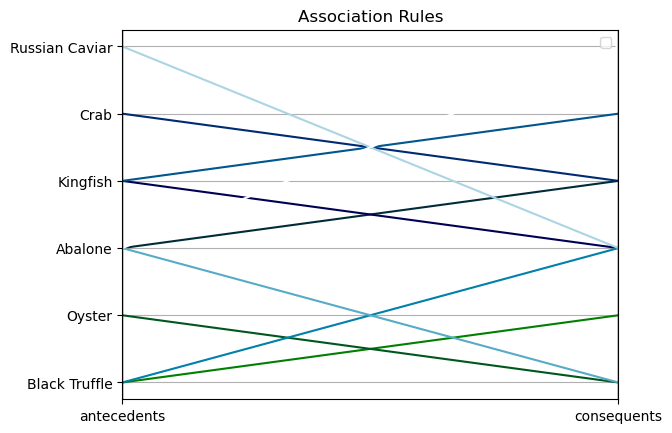

In [7]:
## Using Parallel cordinate plot to visualize the rules

frequent_itemset_ar['rules'] = frequent_itemset_ar.index

coords= frequent_itemset_ar[['antecedents','consequents','rules']]

parallel_coordinates(coords,'rules',colormap='ocean')

plt.title('Association Rules')
plt.legend([])

As seen above all products are antecedents and consequents to no more than two product except Abalone which is a consequent to three products which are Russian Caviar, King Fish and Black Truffle.

### Heat Map

Text(0.5, 1.0, 'Lift by Association Rules')

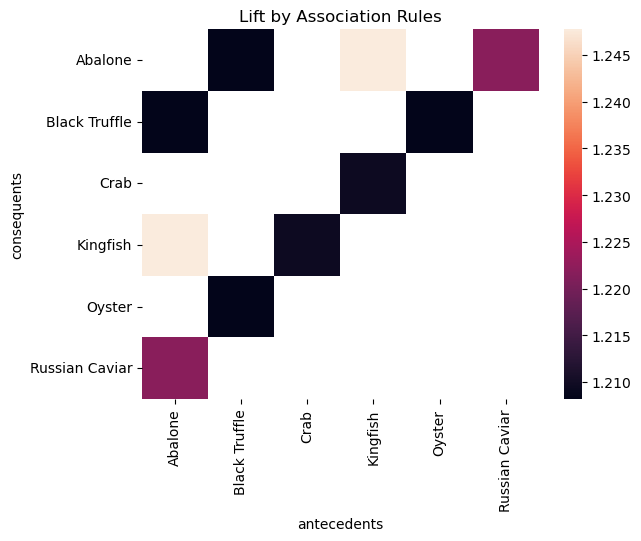

In [8]:
## Transform the data to a pivot table

pivot_table = frequent_itemset_ar.pivot_table(index='consequents',columns='antecedents',values='lift')

sns.heatmap(pivot_table)

plt.title('Lift by Association Rules')

## Recommendations
Although there are associations between item sets from the data analyzed, the strength of the association is not strong enough to require action by the Clique Bait team to make changes in the organization of products and recommendation algorithm of the store. 
